# 準備

今回は簡単な集計と可視化をして、データをどう使うのかを説明します  
データは令和4年7月に埼玉県で記録的短時間大雨情報が連続で発令されたときのツイートです  
最後は集計と可視化の前には前処理が必要なことを示します

In [1]:
# コードの整形、データ整形、進捗の可視化ライブラリを追加
! pip install jupyter-black pandas tqdm

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [2]:
# 自動コード整形
import jupyter_black

jupyter_black.load()

In [3]:
# データの読み込み

import pandas
import pathlib
from tqdm.notebook import tqdm

# チュートリアルのデータがある場所を指定する
dir_path = pathlib.Path("/content/drive/MyDrive/tutorial_1st_集計と可視化/parsed")
pattern = "*.jsonl"
file_path_list = list(dir_path.glob(pattern))

# データは10分間隔で読み込まれているのでひとつづつ読み込んでまとめる
buff = list()
for file_path in tqdm(file_path_list):
    df = pandas.read_json(file_path, lines=True, orient="record")
    # JSTである情報はもういらないのでここで消す
    df["created_at"] = df["created_at"].dt.tz_localize(None)
    buff.append(df)

df = pandas.concat(buff)

  0%|          | 0/290 [00:00<?, ?it/s]

In [4]:
# 中身の確認
df

,created_at,id_str,text,author_id,source,name,screen_name,quote_count,reply_count,retweet_count,like_count,is_rt,is_qt,is_reply,lang,urls,link,masked
0,2022-07-11 23:00:00,1546494520149569536,RT @dreamcapsuleCEO: 車で信号待ちしてたらヤベぇ会社が目の前に。荷物外ま...,177201424,Twitter for Android,暁子,hinatagaoka,0,0,10,0,True,False,False,ja,[https://t.co/lYKkUR56l6],https://twitter.com/177201424/status/154649452...,RT @USER_NAME: 車で信号待ちしてたらヤベぇ会社が目の前に。荷物外まで溢れとるや...
1,2022-07-11 23:00:02,1546494529033089024,この階段を昇り、\nBlack Bullsの文字を見た瞬間に\n溢れ出た高揚感。\nまたビッ...,1454688869731893248,Twitter for Android,SUB a.k.a. 魔流兄 from あにっこ倶楽部,maruaniakasub,0,0,0,4,False,False,False,ja,[https://t.co/6JvAKV2aSt],https://twitter.com/1454688869731893248/status...,この階段を昇り、\nBlack Bullsの文字を見た瞬間に\n溢れ出た高揚感。\nまたビッ...
2,2022-07-11 23:00:05,1546494540818702336,[07/11 23:00] 【時報】\n交通情報は 上り1件 下り1件 あります。渋滞情報は...,2388805808,アクアライン交通情報ナウ,アクアライン交通情報ナウ,aqualine_now,0,0,0,0,False,False,False,ja,[https://t.co/DbngIjlLx2],https://twitter.com/2388805808/status/15464945...,[07/11 23:00] 【時報】\n交通情報は 上り1件 下り1件 あります。渋滞情報は...
3,2022-07-11 23:00:05,1546494540366123008,RT @Awakend_Citizen: コメント欄\n反論とツッコミで溢れかえってるじゃな...,1335118454790082560,Twitter for iPhone,FXBRS,FXBRS3,0,0,127,0,True,False,False,ja,[],https://twitter.com/1335118454790082560/status...,RT @USER_NAME: コメント欄\n反論とツッコミで溢れかえってるじゃないですか\n...
4,2022-07-11 23:00:06,1546494544266403840,ちなみに背乗り自体は陰謀論でもなんでもなく、ソ連や北が用いる常套手段の一つで実例が多数ある。...,324835414,Twitter Web App,🐽すまん寝＠秩序回復,sumannne,0,1,8,15,False,False,False,ja,[],https://twitter.com/324835414/status/154649454...,ちなみに背乗り自体は陰謀論でもなんでもなく、ソ連や北が用いる常套手段の一つで実例が多数ある。...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,2022-07-13 23:09:57,1547221799997677568,RT @Sankei_news: 「銃の作り方」ネットに氾濫 取り締まりに壁 https:/...,1169881236417867776,Twitter for iPhone,ikosatuki,ikosatuki,0,0,90,0,True,False,False,ja,[https://t.co/zOptAOMbzE],https://twitter.com/1169881236417867776/status...,RT @USER_NAME: 「銃の作り方」ネットに氾濫 取り締まりに壁 <URL> \n\...
685,2022-07-13 23:09:58,1547221802757136384,ダウンした時点で手を貸して連呼してんのに救助来なくてギリギリになって5割は草\nしねよ地雷野良,1526242460665802752,Twitter for iPhone,りむにゃあ,rimunya_,0,0,0,0,False,False,False,ja,[],https://twitter.com/1526242460665802753/status...,ダウンした時点で手を貸して連呼してんのに救助来なくてギリギリになって5割は草\nしねよ地雷野良
686,2022-07-13 23:09:59,1547221806289137664,ここ2、3年でなぜかフジロックがパリピのイベントやと思われてるん嫌やわ\nパリピは1日10k...,1294180545706881024,Twitter for iPhone,エルニーニョ,jhoonnzy,0,0,0,3,False,False,False,ja,[],https://twitter.com/1294180545706881024/status...,ここ2、3年でなぜかフジロックがパリピのイベントやと思われてるん嫌やわ\nパリピは1日10k...
687,2022-07-13 23:09:59,1547221806389805056,RT @EC_Project: シムシティで地元を再現したら全く同じ箇所で渋滞し始めたって話...,125015782,Twitter for Android,那津 雨(or きさらぎ) 💉PPM🐼♥️,amenatu,0,0,8382,0,True,False,False,ja,[],https://twitter.com/125015782/status/154722180...,RT @USER_NAME: シムシティで地元を再現したら全く同じ箇所で渋滞し始めたって話メ...


# 集計と可視化

In [5]:
# 日付単位で集計してみる
# ツイートの収集時刻をJSTに変換済みの created_at だと粒度が細かいので別に作る
# isoformatの出力 -> 2022-07-11T23:00:00+09:00
df["label"] = df["created_at"].apply(
    lambda created_at: created_at.isoformat().split("T")[0]
)
df

,created_at,id_str,text,author_id,source,name,screen_name,quote_count,reply_count,retweet_count,like_count,is_rt,is_qt,is_reply,lang,urls,link,masked,label
0,2022-07-11 23:00:00,1546494520149569536,RT @dreamcapsuleCEO: 車で信号待ちしてたらヤベぇ会社が目の前に。荷物外ま...,177201424,Twitter for Android,暁子,hinatagaoka,0,0,10,0,True,False,False,ja,[https://t.co/lYKkUR56l6],https://twitter.com/177201424/status/154649452...,RT @USER_NAME: 車で信号待ちしてたらヤベぇ会社が目の前に。荷物外まで溢れとるや...,2022-07-11
1,2022-07-11 23:00:02,1546494529033089024,この階段を昇り、\nBlack Bullsの文字を見た瞬間に\n溢れ出た高揚感。\nまたビッ...,1454688869731893248,Twitter for Android,SUB a.k.a. 魔流兄 from あにっこ倶楽部,maruaniakasub,0,0,0,4,False,False,False,ja,[https://t.co/6JvAKV2aSt],https://twitter.com/1454688869731893248/status...,この階段を昇り、\nBlack Bullsの文字を見た瞬間に\n溢れ出た高揚感。\nまたビッ...,2022-07-11
2,2022-07-11 23:00:05,1546494540818702336,[07/11 23:00] 【時報】\n交通情報は 上り1件 下り1件 あります。渋滞情報は...,2388805808,アクアライン交通情報ナウ,アクアライン交通情報ナウ,aqualine_now,0,0,0,0,False,False,False,ja,[https://t.co/DbngIjlLx2],https://twitter.com/2388805808/status/15464945...,[07/11 23:00] 【時報】\n交通情報は 上り1件 下り1件 あります。渋滞情報は...,2022-07-11
3,2022-07-11 23:00:05,1546494540366123008,RT @Awakend_Citizen: コメント欄\n反論とツッコミで溢れかえってるじゃな...,1335118454790082560,Twitter for iPhone,FXBRS,FXBRS3,0,0,127,0,True,False,False,ja,[],https://twitter.com/1335118454790082560/status...,RT @USER_NAME: コメント欄\n反論とツッコミで溢れかえってるじゃないですか\n...,2022-07-11
4,2022-07-11 23:00:06,1546494544266403840,ちなみに背乗り自体は陰謀論でもなんでもなく、ソ連や北が用いる常套手段の一つで実例が多数ある。...,324835414,Twitter Web App,🐽すまん寝＠秩序回復,sumannne,0,1,8,15,False,False,False,ja,[],https://twitter.com/324835414/status/154649454...,ちなみに背乗り自体は陰謀論でもなんでもなく、ソ連や北が用いる常套手段の一つで実例が多数ある。...,2022-07-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,2022-07-13 23:09:57,1547221799997677568,RT @Sankei_news: 「銃の作り方」ネットに氾濫 取り締まりに壁 https:/...,1169881236417867776,Twitter for iPhone,ikosatuki,ikosatuki,0,0,90,0,True,False,False,ja,[https://t.co/zOptAOMbzE],https://twitter.com/1169881236417867776/status...,RT @USER_NAME: 「銃の作り方」ネットに氾濫 取り締まりに壁 <URL> \n\...,2022-07-13
685,2022-07-13 23:09:58,1547221802757136384,ダウンした時点で手を貸して連呼してんのに救助来なくてギリギリになって5割は草\nしねよ地雷野良,1526242460665802752,Twitter for iPhone,りむにゃあ,rimunya_,0,0,0,0,False,False,False,ja,[],https://twitter.com/1526242460665802753/status...,ダウンした時点で手を貸して連呼してんのに救助来なくてギリギリになって5割は草\nしねよ地雷野良,2022-07-13
686,2022-07-13 23:09:59,1547221806289137664,ここ2、3年でなぜかフジロックがパリピのイベントやと思われてるん嫌やわ\nパリピは1日10k...,1294180545706881024,Twitter for iPhone,エルニーニョ,jhoonnzy,0,0,0,3,False,False,False,ja,[],https://twitter.com/1294180545706881024/status...,ここ2、3年でなぜかフジロックがパリピのイベントやと思われてるん嫌やわ\nパリピは1日10k...,2022-07-13
687,2022-07-13 23:09:59,1547221806389805056,RT @EC_Project: シムシティで地元を再現したら全く同じ箇所で渋滞し始めたって話...,125015782,Twitter for Android,那津 雨(or きさらぎ) 💉PPM🐼♥️,amenatu,0,0,8382,0,True,False,False,ja,[],https://twitter.com/125015782/status/154722180...,RT @USER_NAME: シムシティで地元を再現したら全く同じ箇所で渋滞し始めたって話メ...,2022-07-13


<AxesSubplot:>

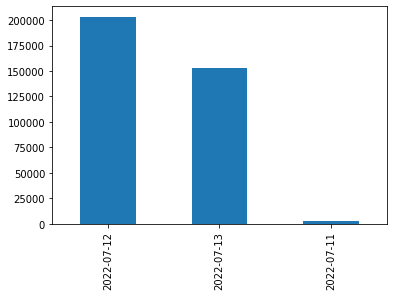

In [6]:
# 作った情報を元に集計をかけてプロット
counts_all = df["label"].value_counts()
counts_all.plot(kind="bar")

<AxesSubplot:>

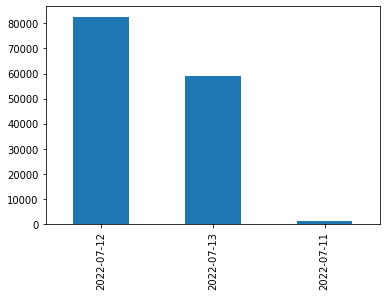

In [7]:
# RTではないオリジナルツイートを数える
# 収集済みデータにはRTか否かの is_rt があるのでそれを使って集計する
original_tweets = df.query("is_rt == False")
counts_original_tweet = original_tweets["label"].value_counts()
counts_original_tweet.plot(kind="bar")

<AxesSubplot:>

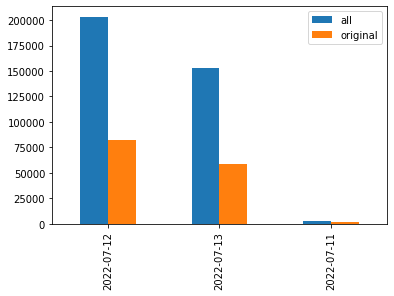

In [8]:
# 見づらいので並べてみる
compare_df = pandas.DataFrame()
compare_df["all"] = counts_all
compare_df["original"] = counts_original_tweet
compare_df.plot(kind="bar")

In [9]:
# 割合にしてみる
compare_df["original_rate"] = compare_df.apply(
    lambda x: round(x["original"] / x["all"], 2), axis=1
)
compare_df["rt_rate"] = compare_df.apply(lambda x: 1 - x["original_rate"], axis=1)
compare_df

,all,original,original_rate,rt_rate
2022-07-12,203331,82680,0.41,0.59
2022-07-13,153185,58943,0.38,0.62
2022-07-11,2809,1291,0.46,0.54


<AxesSubplot:>

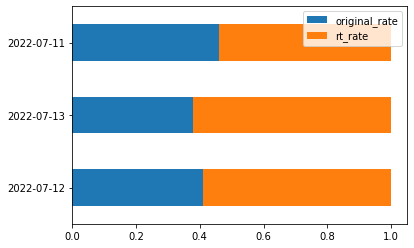

In [10]:
# 積み上げグラフに上で横向きにしてみる
stucked = compare_df.loc[:, ["original_rate", "rt_rate"]]
stucked.plot(kind="barh", stacked=True)

In [11]:
# 次はもっと細かい単位に区切ってみたいので、時間を扱うライブラリを追加
! pip install python-dateutil

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [12]:
# 細かく期間を区切る

import dateutil

# pythonのdatetimeと異なり、よしなに読み込んでくれる
start = dateutil.parser.parse("2022-07-11 23:00")
# startから3時間経過した時刻を得る
end = start + dateutil.relativedelta.relativedelta(hours=3)
print(start, end)

# 元のDataFrameからstartとendの区間を切り出す
filtered_by_time = original_tweets[
    (start <= original_tweets["created_at"]) & (original_tweets["created_at"] < end)
]
filtered_by_time

2022-07-11 23:00:00 2022-07-12 02:00:00


,created_at,id_str,text,author_id,source,name,screen_name,quote_count,reply_count,retweet_count,like_count,is_rt,is_qt,is_reply,lang,urls,link,masked,label
1,2022-07-11 23:00:02,1546494529033089024,この階段を昇り、\nBlack Bullsの文字を見た瞬間に\n溢れ出た高揚感。\nまたビッ...,1454688869731893248,Twitter for Android,SUB a.k.a. 魔流兄 from あにっこ倶楽部,maruaniakasub,0,0,0,4,False,False,False,ja,[https://t.co/6JvAKV2aSt],https://twitter.com/1454688869731893248/status...,この階段を昇り、\nBlack Bullsの文字を見た瞬間に\n溢れ出た高揚感。\nまたビッ...,2022-07-11
2,2022-07-11 23:00:05,1546494540818702336,[07/11 23:00] 【時報】\n交通情報は 上り1件 下り1件 あります。渋滞情報は...,2388805808,アクアライン交通情報ナウ,アクアライン交通情報ナウ,aqualine_now,0,0,0,0,False,False,False,ja,[https://t.co/DbngIjlLx2],https://twitter.com/2388805808/status/15464945...,[07/11 23:00] 【時報】\n交通情報は 上り1件 下り1件 あります。渋滞情報は...,2022-07-11
4,2022-07-11 23:00:06,1546494544266403840,ちなみに背乗り自体は陰謀論でもなんでもなく、ソ連や北が用いる常套手段の一つで実例が多数ある。...,324835414,Twitter Web App,🐽すまん寝＠秩序回復,sumannne,0,1,8,15,False,False,False,ja,[],https://twitter.com/324835414/status/154649454...,ちなみに背乗り自体は陰謀論でもなんでもなく、ソ連や北が用いる常套手段の一つで実例が多数ある。...,2022-07-11
5,2022-07-11 23:00:07,1546494547278331904,大きな地震がありませんように\n噴火や津波や水害や土砂崩れや台風や隕石や大雪などの災害が起き...,1087592789670453248,Twitter for Android,トイレの紙さま４,e2MQuxkEUiLgv3t,0,0,0,0,False,False,False,ja,[],https://twitter.com/1087592789670453248/status...,大きな地震がありませんように\n噴火や津波や水害や土砂崩れや台風や隕石や大雪などの災害が起き...,2022-07-11
7,2022-07-11 23:00:08,1546494552500215808,@kanpati5525_Eve スマホ水没して死んでた！wwただいま！！w,1357998400780734464,Twitter for Android,ときお👁️‍🗨️武道館両日参戦🔥,o0OtokiO0o,0,1,0,1,False,False,True,ja,[],https://twitter.com/1357998400780734464/status...,@USER_NAME スマホ水没して死んでた！wwただいま！！w,2022-07-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,2022-07-12 01:59:44,1546539750294958080,すんごい大雨で目が覚めた😱,949812901598044160,Twitter for iPhone,ぷわニキ,PuwaPuwa1138,0,0,0,1,False,False,False,ja,[],https://twitter.com/949812901598044160/status/...,すんごい大雨で目が覚めた😱,2022-07-12
228,2022-07-12 01:59:49,1546539769584226304,嫌な予感がする…明日大雨な気がする🙄\n仕事中降るなよフリじゃないからな…\n\n暑すぎるの...,1170334538632818688,Twitter for iPhone,ゆかりん@かえちょん最推し🍁🐶❤️,shia_yukari,0,0,0,1,False,False,False,ja,[],https://twitter.com/1170334538632818689/status...,嫌な予感がする…明日大雨な気がする🙄\n仕事中降るなよフリじゃないからな…\n\n暑すぎるの...,2022-07-12
230,2022-07-12 01:59:55,1546539795794386944,@LanqiW @BluesYak @nytchinese 中國到處都在停電喔\n#用爱发电...,1441316099862122496,Twitter Web App,yanyan程妍︱中國到處都在停電喔︱帶顆鎖來Fo我→必封鎖︱色情推→必封鎖,2021yanyan,0,0,0,0,False,False,True,zh,"[https://t.co/CVzd4vgHfx, https://t.co/CVzd4vg...",https://twitter.com/1441316099862122504/status...,@USER_NAME @USER_NAME @USER_NAME 中國到處都在停電喔\n#用...,2022-07-12
231,2022-07-12 01:59:58,1546539809363345408,@UomiHiren_v ん〜ギリ冠水しないかな〜場所による https://t.co/n4...,848765270416007168,Twitter for Android,超ベジット,vejitto19870910,0,1,0,0,False,False,True,ja,[https://t.co/n4xmJcAnE0],https://twitter.com/848765270416007168/status/...,@USER_NAME ん〜ギリ冠水しないかな〜場所による <URL>,2022-07-12


/tmp/ipykernel_437/750272703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_by_time["label"] = filtered_by_time["created_at"].apply(


<AxesSubplot:>

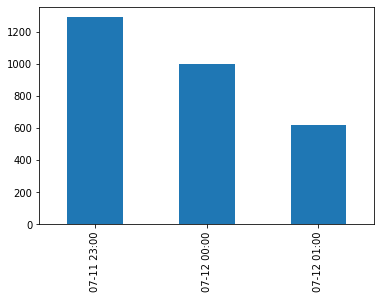

In [13]:
# 今度は1時間単位で区切ってみる
# isoformat -> 2022-07-11T23:00:00+09:00
filtered_by_time["label"] = filtered_by_time["created_at"].apply(
    lambda t: t.strftime("%m-%d %H:00")
)
count_filtered_by_time = filtered_by_time["label"].value_counts().sort_index()
count_filtered_by_time.plot(kind="bar")

/tmp/ipykernel_437/2654898263.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_by_time["label"] = filtered_by_time["created_at"].apply(_convert)


<AxesSubplot:>

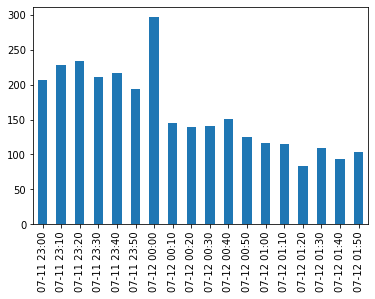

In [14]:
# 更に短く10分単位で切る
# isoformat -> 2022-07-11T23:00:00+09:00


def _convert(t):
    converted = t.strftime("%m-%d %H:%M")
    tail = converted[-1]
    if not tail == "0":
        converted = f"{converted[:-1]}0"
    return converted


filtered_by_time["label"] = filtered_by_time["created_at"].apply(_convert)
count_filtered_by_time = filtered_by_time["label"].value_counts().sort_index()
count_filtered_by_time.plot(kind="bar")

In [15]:
# ひとつだけ数が多い時間帯があるので見てみる

pandas.set_option("display.max_colwidth", None)

filtered_by_time.query("label == '07-12 00:00'").loc[:, ["name", "text"]].head(30)

,name,text
0,ライフ・トレック＠災害に備える,ライフ・トレック（人生は冒険だ）\n【豆知識・通電火災】\n停電からの復旧後には、再通電時に出火する「通電火災」の発生の可能性がある。通電火災の発生時は住民が避難していて初期消火が行えないおそれがある。\n#地震
1,検問三郎,イヤホン水没モチベdead
2,中國新聞社,11日是中國第18個航海日，大型海事巡航救助船“海巡06”輪當天正式列編福建。“海巡06”輪船長128.6米，型寬16米，型深7.9米，滿載排水量6600噸，主推進系統總功率13920千瓦，最高航速23節，續航力10000海里，自持力60天，能到達全球除南北極以外的所有海域，是目前台灣海峽體量最大、性能最優的公務船艇。 https://t.co/6IOxRNR7LO
4,熊野とく,"7月12日432年前天正18年、秀吉が家康に三河他から関八州への国替えを命じる前日\n北条氏が降伏しその領地を家康が治めることになる関八州の国替え\n先祖代々の土地を離れることに、徳川家臣団は猛反発するも秀吉の力は強く家康は従う事を決める\nこの頃の江戸は,川の氾濫など大規模な治水事業を強いられる"
5,貨物運用情報,【輸送状況】山陽線 広島・山口県内 大雨(遅れ・運休)\n\n東海道線 静岡県内 大雨(運休)\n\n東海道線 静岡県内 大雨(遅れ・運休)\n\n鹿児島・肥薩おれんじ鉄道線 熊本・鹿児島県内 大雨(運休)
7,アクアライン交通情報ナウ,[07/12 00:00] 【時報】\n交通情報は 上り1件 下り2件 あります。渋滞情報はありません。現在の風速:東南東3mです。\n https://t.co/DbngIj4Iv2
10,Nami,@canikama3 がんばれー！\n私もトレカ整理しないと溢れかえっているのを思い出して寝れなくなったw
11,(たまご✖️５)➗２,『🎁BOX渋滞🎁🆘固定RT🆘』- 太心🔴🐮🔵#🆘固定RT🆘さんのミクチャライブに参加しよう！ #ミクチャ https://t.co/VoPPudEvTk
12,かやづ,Eテレ2355 月曜ですが～チームカブトムシの歌🎶 ﾅﾂｶﾞｷﾀ～ﾅﾂﾅﾂﾅﾂﾅﾂ・・\n\n明日から戻り梅雨というか梅雨末期の大雨予報ですが・・
13,🈲マシュ🈲 #古事記は滅,『🎁BOX渋滞🎁🆘固定RT🆘』- 太心🔴🐮🔵#🆘固定RT🆘さんのミクチャライブに参加しよう！ #ミクチャ https://t.co/rPK8n93PwA


In [16]:
# 自動投稿や別言語のツイートが混ざっているようなので除外できないかメタデータを元に確認する

# sourceはツイートを投稿するときにユーザーが利用したクライアント
# langはツイートの言語
# linkはツイートへの直接飛べるリンク

filtered_by_time.query("label == '07-12 00:00'").loc[
    :, ["name", "text", "lang", "source", "link"]
].head(30)

,name,text,lang,source,link
0,ライフ・トレック＠災害に備える,ライフ・トレック（人生は冒険だ）\n【豆知識・通電火災】\n停電からの復旧後には、再通電時に出火する「通電火災」の発生の可能性がある。通電火災の発生時は住民が避難していて初期消火が行えないおそれがある。\n#地震,ja,Twitter,https://twitter.com/3947123240/status/1546509624349949952
1,検問三郎,イヤホン水没モチベdead,ja,Twitter for Android,https://twitter.com/1058283680/status/1546509626027700226
2,中國新聞社,11日是中國第18個航海日，大型海事巡航救助船“海巡06”輪當天正式列編福建。“海巡06”輪船長128.6米，型寬16米，型深7.9米，滿載排水量6600噸，主推進系統總功率13920千瓦，最高航速23節，續航力10000海里，自持力60天，能到達全球除南北極以外的所有海域，是目前台灣海峽體量最大、性能最優的公務船艇。 https://t.co/6IOxRNR7LO,zh,Twitter Web App,https://twitter.com/1597435105/status/1546509630481649667
4,熊野とく,"7月12日432年前天正18年、秀吉が家康に三河他から関八州への国替えを命じる前日\n北条氏が降伏しその領地を家康が治めることになる関八州の国替え\n先祖代々の土地を離れることに、徳川家臣団は猛反発するも秀吉の力は強く家康は従う事を決める\nこの頃の江戸は,川の氾濫など大規模な治水事業を強いられる",ja,Twitter Web App,https://twitter.com/1363941555149574146/status/1546509631521845251
5,貨物運用情報,【輸送状況】山陽線 広島・山口県内 大雨(遅れ・運休)\n\n東海道線 静岡県内 大雨(運休)\n\n東海道線 静岡県内 大雨(遅れ・運休)\n\n鹿児島・肥薩おれんじ鉄道線 熊本・鹿児島県内 大雨(運休),ja,suitaEngine,https://twitter.com/3124429276/status/1546509640980058113
7,アクアライン交通情報ナウ,[07/12 00:00] 【時報】\n交通情報は 上り1件 下り2件 あります。渋滞情報はありません。現在の風速:東南東3mです。\n https://t.co/DbngIj4Iv2,ja,アクアライン交通情報ナウ,https://twitter.com/2388805808/status/1546509640573526017
10,Nami,@canikama3 がんばれー！\n私もトレカ整理しないと溢れかえっているのを思い出して寝れなくなったw,ja,Twitter for iPhone,https://twitter.com/1207482398935375872/status/1546509668289515520
11,(たまご✖️５)➗２,『🎁BOX渋滞🎁🆘固定RT🆘』- 太心🔴🐮🔵#🆘固定RT🆘さんのミクチャライブに参加しよう！ #ミクチャ https://t.co/VoPPudEvTk,ja,MixChannel - ミクチャ,https://twitter.com/1301774819604586496/status/1546509669858148353
12,かやづ,Eテレ2355 月曜ですが～チームカブトムシの歌🎶 ﾅﾂｶﾞｷﾀ～ﾅﾂﾅﾂﾅﾂﾅﾂ・・\n\n明日から戻り梅雨というか梅雨末期の大雨予報ですが・・,ja,Twitter Web App,https://twitter.com/535580256/status/1546509675180748800
13,🈲マシュ🈲 #古事記は滅,『🎁BOX渋滞🎁🆘固定RT🆘』- 太心🔴🐮🔵#🆘固定RT🆘さんのミクチャライブに参加しよう！ #ミクチャ https://t.co/rPK8n93PwA,ja,MixChannel - ミクチャ,https://twitter.com/1439971080433647618/status/1546509675369463810


# まとめ

1. pandasで読み込み→applyで新しい区切りを作る→queryで絞り込む
2. それらをplotで可視化・比較して分析するべきポイントを絞り込むの繰り返し
3. ただし、ツイートには分析から除外するべきものを多分に含むので、langやsourceも見る

特に0時の場合は、時報や日時で動作するBOT投稿が多いため、影響を受けやすい  
次のチュートリアルでデータから除外するべきものをどうやって除くか試してみる